## Farouk BENKHELIFA <br><br>3rd Task **CREDIT SCORING MODEL** <br><br>CodeAlpha

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OrdinalEncoder

In [2]:
dataset_train = pd.read_csv("train.csv", low_memory=False)

In [3]:
dataset_train

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.86622816574095,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.651610435322,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.8090832742814,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.1649785257098,Standard


In [4]:
#split our dataset to train, valid and test sets 
dataset, test = train_test_split(dataset_train, test_size=0.20, random_state=42)

In [5]:
# Function to convert "Years and Months" to total months
def convert_to_months(value):
    if pd.isnull(value):
        return np.nan
    years, months = 0, 0
    parts = value.split('and')
    if 'Years' in parts[0]:
        years = int(parts[0].strip().split()[0])
    if 'Months' in parts[1]:
        months = int(parts[1].strip().split()[0])
    return years * 12 + months

# Apply the function to the column
dataset['Credit_History_Age_in_Months'] = dataset['Credit_History_Age'].apply(convert_to_months)
test['Credit_History_Age_in_Months'] = test['Credit_History_Age'].apply(convert_to_months)


In [6]:
# Drop unnecessary columns
dataset = dataset.drop(["Name", "Credit_History_Age", "SSN", "ID", "Customer_ID"], axis=1)
test = test.drop(["Name", "Credit_History_Age", "SSN", "ID", "Customer_ID"], axis=1)

In [7]:
dataset['Credit_History_Age_in_Months'] = dataset['Credit_History_Age_in_Months'].fillna(dataset['Credit_History_Age_in_Months'].median())
dataset['Monthly_Inhand_Salary'] = dataset['Monthly_Inhand_Salary'].fillna(dataset['Monthly_Inhand_Salary'].median())
dataset['Num_Credit_Inquiries'] = dataset['Num_Credit_Inquiries'].fillna(dataset['Num_Credit_Inquiries'].median())

test['Credit_History_Age_in_Months'] = test['Credit_History_Age_in_Months'].fillna(test['Credit_History_Age_in_Months'].median())
test['Monthly_Inhand_Salary'] = test['Monthly_Inhand_Salary'].fillna(test['Monthly_Inhand_Salary'].median())
test['Num_Credit_Inquiries'] = test['Num_Credit_Inquiries'].fillna(test['Num_Credit_Inquiries'].median())

In [8]:
# Define the columns to be converted to numeric for each dataset
columns_to_numeric = [
    'Amount_invested_monthly', 'Monthly_Balance', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
    'Age', 'Annual_Income', 'Num_of_Loan', 'Outstanding_Debt'
]

# List of datasets to apply the transformation
datasets = [dataset, test]

for data in datasets:
    # Handle non-numeric characters in the relevant columns
    data['Age'] = data['Age'].str.replace(r'\D', '', regex=True)
    data['Annual_Income'] = data['Annual_Income'].str.replace(r'\D', '', regex=True)
    data['Num_of_Loan'] = data['Num_of_Loan'].str.replace(r'\D', '', regex=True)
    data['Outstanding_Debt'] = data['Outstanding_Debt'].str.replace(r'\D', '', regex=True)

    # Convert the columns to numeric and handle errors
    for column in columns_to_numeric:
        # Convert column to numeric, setting invalid parsing to NaN
        data[column] = pd.to_numeric(data[column], errors='coerce')
        # Fill NaN values with the mean of the column
        data[column] = data[column].fillna(data[column].median())


In [9]:
dataset

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_in_Months
75220,May,20,Journalist,10139913,8535.927500,1,3,2,2,"Mortgage Loan, and Personal Loan",...,Good,106106,42.681159,No,132.674897,114.299386,High_spent_Medium_value_payments,856.618467,Standard,297.0
48955,April,25,Accountant,11288268,9684.890000,5,1,10,4,"Credit-Builder Loan, Home Equity Loan, Not Spe...",...,Good,7229,40.090839,No,353.616124,166.446410,High_spent_Large_value_payments,688.426466,Good,347.0
44966,July,49,Scientist,2810146,2173.463807,5,7,8,3,"Student Loan, Credit-Builder Loan, and Debt Co...",...,Standard,45467,23.607892,No,268.268012,129.181273,Low_spent_Small_value_payments,242.921080,Good,321.0
13568,January,34,Manager,2243827,1856.855833,7,7,9,4,"Mortgage Loan, Debt Consolidation Loan, Studen...",...,_,16757,27.094189,No,58.436308,105.165644,Low_spent_Large_value_payments,292.083631,Standard,219.0
92727,August,28,Media_Manager,209754,1943.950000,2,3,9,1,Auto Loan,...,Good,7314,26.205042,NM,16.196792,67.158201,High_spent_Medium_value_payments,361.040007,Good,291.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,February,46,Developer,8206516,6771.763333,5,5,3,3,"Not Specified, Home Equity Loan, and Auto Loan",...,Good,10683,35.131041,No,180.340607,439.840179,High_spent_Small_value_payments,316.995547,Good,276.0
54886,July,20,Accountant,1492097,1424.414167,6,10,16,2,"Auto Loan, and Student Loan",...,Standard,128858,33.572279,Yes,19.909512,110.084240,Low_spent_Small_value_payments,302.447665,Poor,161.0
76820,May,38,Manager,6685827,5770.522500,3,6,3990,4,"Student Loan, Home Equity Loan, Payday Loan, a...",...,Standard,60158,37.982933,NM,175.015182,364.707052,Low_spent_Medium_value_payments,317.330016,Standard,337.0
860,May,55,Doctor,19403405,1904.950417,1,7,3,3,"Debt Consolidation Loan, Debt Consolidation Lo...",...,_,33911,36.826610,No,39.214914,169.858197,Low_spent_Large_value_payments,251.421930,Standard,200.0


In [10]:
# Function to handle missing values and rare category replacement
def process_loan_type(data):
    # Fill NaN with a placeholder
    data['Type_of_Loan'] = data['Type_of_Loan'].fillna('Unknown')
    
    # Replace rare categories with "Other"
    value_counts = data['Type_of_Loan'].value_counts()
    data['Type_of_Loan'] = data['Type_of_Loan'].apply(
        lambda x: x if value_counts[x] > 5 else 'Other'
    )

# Apply the function to each dataset
for d in datasets:
    process_loan_type(d)


In [11]:
encoder = OrdinalEncoder()
dataset['Type_of_Loan'] = encoder.fit_transform(dataset[['Type_of_Loan']])
test['Type_of_Loan'] = encoder.fit_transform(test[['Type_of_Loan']])

In [12]:
Y = dataset['Credit_Score']
X = dataset.drop(['Credit_Score'], axis=1)

testY = test['Credit_Score']
testX = test.drop(['Credit_Score'], axis=1)

In [13]:
columns_to_encode = ['Month', 'Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']
X_train = pd.get_dummies(X, columns=columns_to_encode).astype(int)
Y_train = pd.get_dummies(Y).astype(int)

X_test = pd.get_dummies(testX, columns=columns_to_encode).astype(int)
Y_test = pd.get_dummies(testY).astype(int)

In [14]:
all_columns = pd.get_dummies(pd.concat([X_train, X_test], axis=0)).columns
X_train = pd.get_dummies(X_train).reindex(columns=all_columns, fill_value=0)
X_test = pd.get_dummies(X_test).reindex(columns=all_columns, fill_value=0)

In [15]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(80000, 56)
(20000, 56)
(80000, 3)
(20000, 3)


In [16]:
X_train.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_!@9#%8,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
75220,20,10139913,8535,1,3,2,2,2829,14,6,...,0,1,0,0,0,1,0,0,0,0
48955,25,11288268,9684,5,1,10,4,807,12,10,...,0,1,0,0,1,0,0,0,0,0
44966,49,2810146,2173,5,7,8,3,4709,28,8,...,0,1,0,0,0,0,0,0,0,1
13568,34,2243827,1856,7,7,9,4,2436,16,13,...,0,1,0,0,0,0,0,1,0,0
92727,28,209754,1943,2,3,9,1,0,2,9,...,1,0,0,0,0,1,0,0,0,0


In [17]:
Y_train.head()

,Good,Poor,Standard
75220,0,0,1
48955,1,0,0
44966,1,0,0
13568,0,0,1
92727,1,0,0


In [18]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

In [19]:
# Define the XGBoost model
xgb_model = xgb.XGBClassifier(
    objective="multi:softmax",  # Multi-class classification
    num_class=3,               # Number of classes (Good, Poor, Standard)
    random_state=42
)

# Define hyperparameter grid for tuning
param_grid = {
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [3, 5, 7],
    "n_estimators": [50, 100, 200],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}

# Perform GridSearchCV for best parameters
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring="accuracy",
    cv=3,  # 3-fold cross-validation
    verbose=1
)

In [21]:
# Map labels to numeric values
label_mapping = {'Good': 0, 'Poor': 1, 'Standard': 2}

# Convert Y_train and Y_test to numeric
Y_train = Y_train.idxmax(axis=1).map(label_mapping)
Y_test = Y_test.idxmax(axis=1).map(label_mapping)


In [24]:
# Fit the model with training data
grid_search.fit(X_train, Y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_class=3,
                                     num_parallel_tree=None, ...),
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=1)

In [25]:
# Best parameters and model
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Predictions
predictions = best_model.predict(X_test)

# Reverse mapping for interpretation
reverse_label_mapping = {0: 'Good', 1: 'Poor', 2: 'Standard'}
predictions_mapped = pd.Series(predictions).map(reverse_label_mapping)

# Print accuracy and classification report
accuracy = accuracy_score(Y_test, predictions)
print(f"Test Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(Y_test, predictions))


Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Test Accuracy: 0.7406
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.69      0.67      3527
           1       0.73      0.73      0.73      5874
           2       0.77      0.76      0.77     10599

    accuracy                           0.74     20000
   macro avg       0.72      0.73      0.72     20000
weighted avg       0.74      0.74      0.74     20000



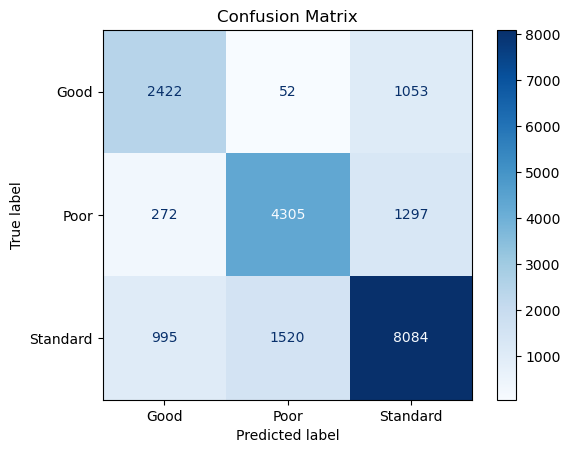

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion matrix
ConfusionMatrixDisplay.from_predictions(
    Y_test, predictions, display_labels=["Good", "Poor", "Standard"], cmap="Blues"
)
plt.title("Confusion Matrix")
plt.show()


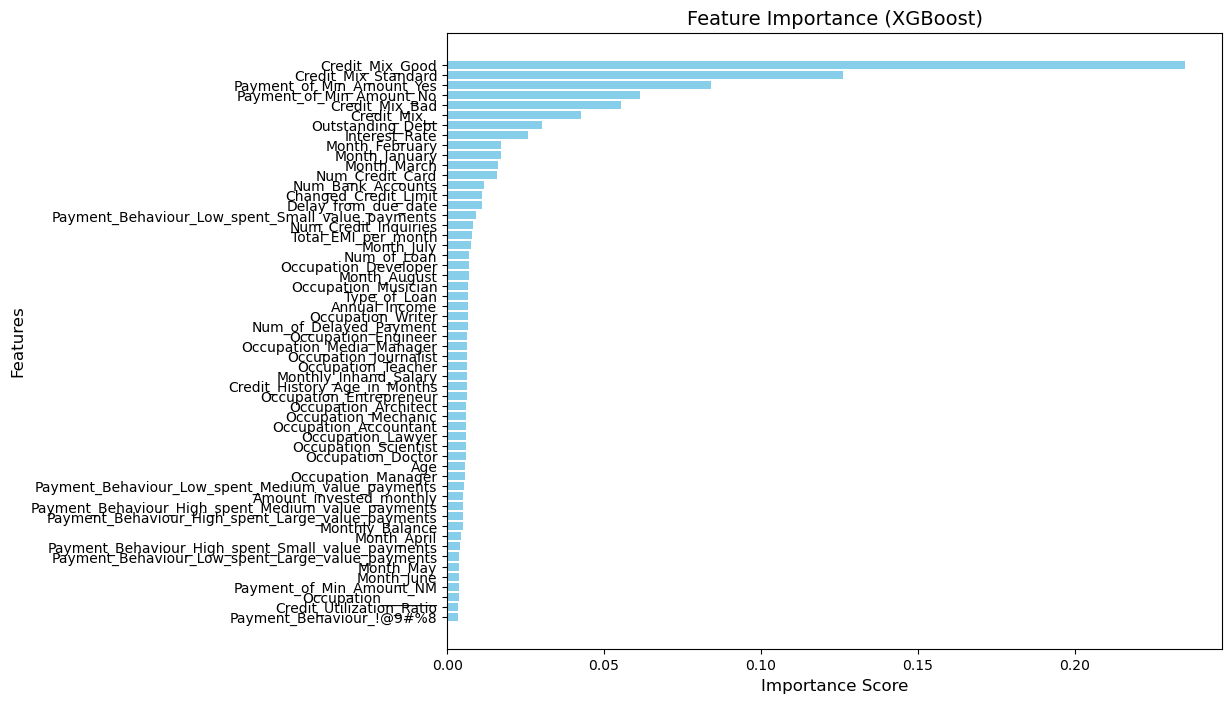

In [29]:
# Feature importance from the best model
importance = best_model.feature_importances_
features = X_train.columns

# Sort and plot
sorted_idx = importance.argsort()
plt.figure(figsize=(10, 8))
plt.barh(features[sorted_idx], importance[sorted_idx], color="skyblue")
plt.title("Feature Importance (XGBoost)", fontsize=14)
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.show()
